Import packages but we have to instal them before use by pip in cmd window

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

We load an Image and show it but the image is GBR so we convert it to RGB Image.
We do it by two method:
1- Do it by changing vectors
2- Do ot by using special code

Text(0.5, 1.0, '(RGBImage Real color by second method')

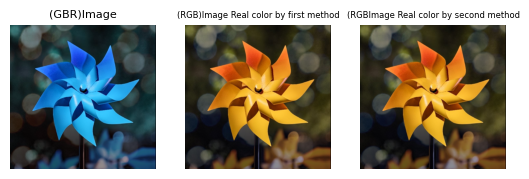

In [39]:
# Load image from Image folder
I1=cv.imread('Image/flower.jpg')
# Show image 
plt.subplot(1,3,1)
plt.imshow(I1)
plt.axis('off')
a='GBR'
plt.title(f'({a})Image',fontsize=8)
# Change GBR image to RGB image by first method
S=I1.shape
I2=np.zeros((S[0],S[1],S[2]),dtype=np.uint8)
I2[:,:,0]=I1[:,:,2]
I2[:,:,1]=I1[:,:,1]
I2[:,:,2]=I1[:,:,0]
plt.subplot(1,3,2)
plt.imshow(I2)
plt.axis('off')
b='RGB'
plt.title(f'({b})Image Real color by first method',fontsize=6)
# Change GBR image to RGB image by first method
I2=cv.cvtColor(I1, cv.COLOR_BGR2RGB)
plt.subplot(1,3,3)
plt.imshow(I2)
plt.axis('off')
plt.title(f'({b}Image Real color by second method',fontsize=6)

Image Shearing:
We make a trosformation matrix and then use opencv function "cv.warpAffine"
We have an example below:

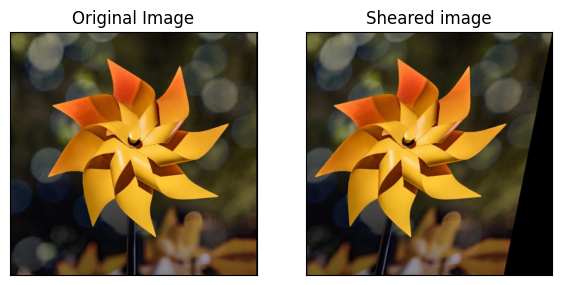

In [60]:
# Define the Shearing factor
shearX = -.2
shearY = 0
# Define the Transformation matrix for shearing
TSh = np.array([[1, shearX, 0], [0, 1, shearY]], dtype=np.float32)
# Image shape along X and Y
width = I2.shape[1]
height = I2.shape[0]
# Apply shearing
I3 = cv.warpAffine(I2,TSh, (width, height))
# Show images by subplot and change the size of them
fig, axs = plt.subplots(1, 2, figsize=(7, 4))
# Plot the original image
axs[0].imshow(I2)
axs[0].set_title('Original Image')

# Plot the Sheared image
axs[1].imshow(I3)
axs[1].set_title('Sheared image')
# Remove ticks from the subplots
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])


Show histogram before normalization
We split RGB image to 3 matrix which are r, g, and b and then compute histogram for each of them

Text(0.5, 1.0, 'Hist Blue')

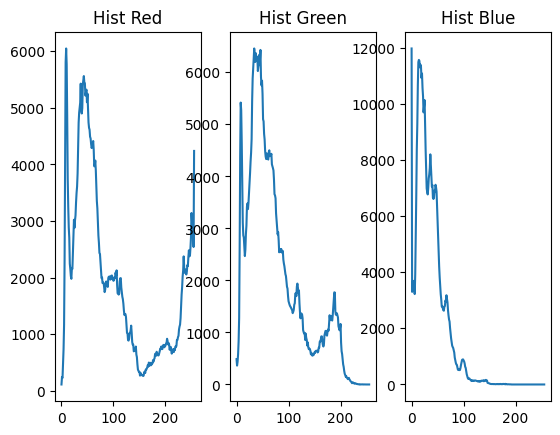

In [136]:
# Split the image into channels
r, g, b = cv.split(I2)
# Show histograms
hist_r = cv.calcHist([r], [0], None, [256], [0, 256])
plt.subplot(1,3,1)
plt.plot(hist_r)
plt.title('Hist Red')
hist_g = cv.calcHist([g], [0], None, [256], [0, 256])
plt.subplot(1,3,2)
plt.plot(hist_g)
plt.title('Hist Green')
hist_b = cv.calcHist([b], [0], None, [256], [0, 256])
plt.subplot(1,3,3)
plt.plot(hist_b)
plt.title('Hist Blue')

Normalize image and show it

(-0.5, 716.5, 705.5, -0.5)

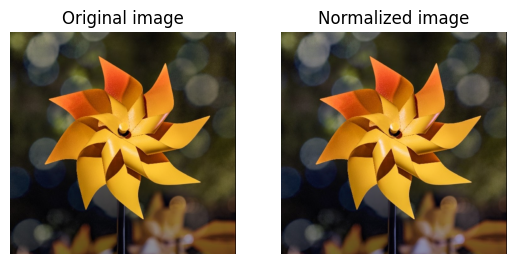

In [153]:
# Normalization parameter
min_value = 0
max_value = 1
norm_type = cv.NORM_MINMAX
# Normalize each channel
rn = cv.normalize(r.astype('float'), None, min_value, max_value, norm_type)
gn = cv.normalize(g.astype('float'), None, min_value, max_value, norm_type)
bn = cv.normalize(b.astype('float'), None, min_value, max_value, norm_type)
# Merge the normalized channels back into an image
normalized_image = cv.merge((rn, gn, bn))
#Show original image
plt.subplot(1,2,1)
plt.imshow(I2)
plt.title('Original image')
plt.axis('off')
#Show Normalized image
plt.subplot(1,2,2)
plt.imshow(normalized_image)
plt.title('Normalized image')
plt.axis('off')

In [150]:
Edge detection by Canny method

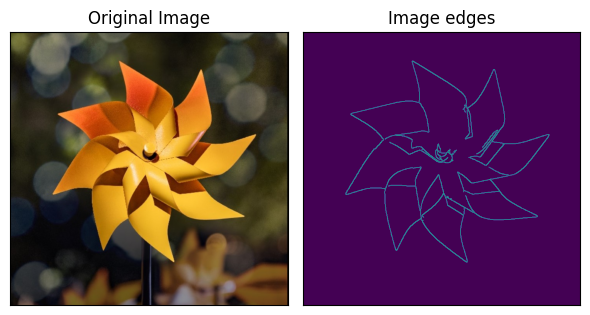

In [166]:
# Apply Canny edge detection
edges = cv.Canny(image= I2, threshold1=100, threshold2=500)
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(6, 6))
 
# Plot the original image
axs[0].imshow(I2)
axs[0].set_title('Original Image')
 
# Plot the blurred image
axs[1].imshow(edges)
axs[1].set_title('Image edges')
 
# Remove ticks from the subplots
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])
 
# Display the subplots
plt.tight_layout()
plt.show()